In [1]:
#!pip install yfinance

import yfinance as yf


In [3]:
data = yf.download('TQQQ', start = '2022-01-01')

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,83.915001,85.720001,82.559998,85.565002,85.565002,76505200
2022-01-04,85.915001,85.945000,80.195000,82.239998,82.239998,106648200
2022-01-05,81.190002,81.860001,74.500000,74.675003,74.675003,133245200
2022-01-06,73.514999,76.404999,72.209999,74.470001,74.470001,154226600
2022-01-07,74.449997,75.470001,71.000000,72.035004,72.035004,142713400
...,...,...,...,...,...,...
2022-05-24,27.150000,27.360001,25.430000,26.900000,26.900000,183244300
2022-05-25,26.440001,28.600000,26.389999,27.980000,27.980000,180641900
2022-05-26,27.760000,30.780001,27.680000,30.320000,30.320000,168565800


/tmp/ipykernel_1565/2092938870.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data.plot(figsize=(12, 4), y={'High', 'Low'})


<AxesSubplot:xlabel='Date'>

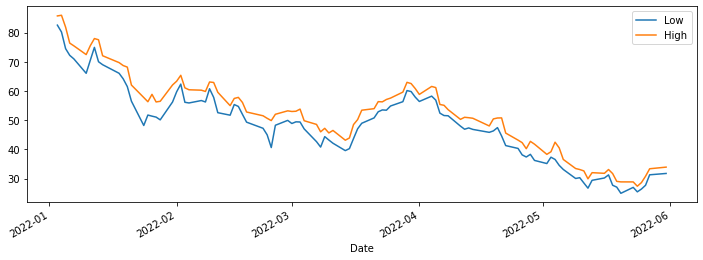

In [16]:
%matplotlib inline
data.plot(figsize=(12, 4), y={'High', 'Low'})
#ax = city_df.plot(kind='bar', title='날씨', figsize=(12, 4), legend=True, fontsize=12)

In [25]:
#!pip3 install pymongo
import pymongo

id = 'frogmon'
pw = 'rhlrnf8359!'
host = 'frogmon.synology.me'
aport = 27017
client = pymongo.MongoClient("mongodb://%s:%s@%s:%s/?serverSelectionTimeoutMS=5000&connectTimeoutMS=10000" % (id, pw, host, aport))

db = client.stock
col = db.stock_info
stock_data = col.find({"symbol": 'AAPL'})

stock_data[0]['symbol']

'AAPL'